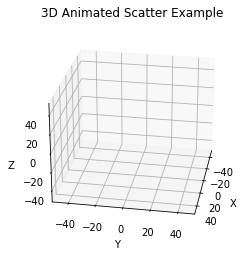

In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

def generate_data(nbr_iterations, nbr_elements):
    """
    Generates dummy data.
    The elements will be assigned random initial positions and speed.

    Args:
        nbr_iterations (int): Number of iterations data needs to be generated for.
        nbr_elements (int): Number of elements (or points) that will move.

    Returns:
        list: list of positions of elements. (Iterations x (# Elements x Dimensions))
    """
    dims = (3,1)

    # Random initial positions.
    gaussian_mean = np.zeros(dims)
    gaussian_std = np.ones(dims)
    start_positions = np.array(list(map(np.random.normal, gaussian_mean, gaussian_std, [nbr_elements] * dims[0]))).T

    # Random speed
    start_speed = np.array(list(map(np.random.normal, gaussian_mean, gaussian_std, [nbr_elements] * dims[0]))).T

    # Computing trajectory
    data = [start_positions]
    for iteration in range(nbr_iterations):
        previous_positions = data[-1]
        new_positions = previous_positions + start_speed
        data.append(new_positions)

    return data

def animate_scatters(iteration, data, scatters):
    """
    Update the data held by the scatter plot and therefore animates it.

    Args:
        iteration (int): Current iteration of the animation
        data (list): List of the data positions at each iteration.
        scatters (list): List of all the scatters (One per element)

    Returns:
        list: List of scatters (One per element) with new coordinates
    """
    for i in range(data[0].shape[0]):
        scatters[i]._offsets3d = (data[iteration][i,0:1], data[iteration][i,1:2], data[iteration][i,2:])
    return scatters

def main(data, save=False):
    """
    Creates the 3D figure and animates it with the input data.

    Args:
        data (list): List of the data positions at each iteration.
        save (bool): Whether to save the recording of the animation. (Default to False).
    """

    # Attaching 3D axis to the figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Initialize scatters
    scatters = [ ax.scatter(data[0][i,0:1], data[0][i,1:2], data[0][i,2:]) for i in range(data[0].shape[0]) ]

    # Number of iterations
    iterations = len(data)

    # Setting the axes properties
    ax.set_xlim3d([-50, 50])
    ax.set_xlabel('X')

    ax.set_ylim3d([-50, 50])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-50, 50])
    ax.set_zlabel('Z')

    ax.set_title('3D Animated Scatter Example')

    # Provide starting angle for the view.
    ax.view_init(25, 10)

    ani = animation.FuncAnimation(fig, animate_scatters, iterations, fargs=(data, scatters),
                                       interval=50, blit=False, repeat=True)

    if save:
        Writer = animation.writers['ffmpeg']
        writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800, extra_args=['-vcodec', 'libx264'])
        ani.save('3d-scatted-animated.mp4', writer=writer)

    plt.show()


data = generate_data(100, 2)
main(data, save=True)

In [2]:
import numpy as np
from scipy.spatial.transform import Rotation as R

def perpendicular_vector(v):
    if v[1] == 0 and v[2] == 0:
        if v[0] == 0:
            raise ValueError('zero vector')
        else:
            return np.cross(v, [0, 1, 0])
    return np.cross(v, [1, 0, 0])

def cord_sys(z_ax):
    ''' Represent a coordinate system along given vector
    by three unit vectors
    '''
    x_ax = perpendicular_vector(z_ax)
    y_ax = np.cross(z_ax/np.linalg.norm(z_ax), x_ax/np.linalg.norm(x_ax))
    x_unit = x_ax/np.linalg.norm(x_ax)
    z_unit = z_ax/np.linalg.norm(z_ax)
    
    return {'x': x_unit, 'y': y_ax, 'z': z_unit}

def gen_dot(phi):
    v = [0, 0, 1]
    system = cord_sys(v)
    Rx = R.from_rotvec(phi * system['x'])
    Ry = R.from_rotvec(phi * system['y'])
    rx = Rx.apply(v)
    ry =  Ry.apply(v)
    rr = Rx.apply(ry)
    x, y, z = rr
    xx, yy, zz = ry
    return x, y, z
gen_dot(np.pi)

(-1.2246467991473532e-16, 1.2246467991473532e-16, 1.0)

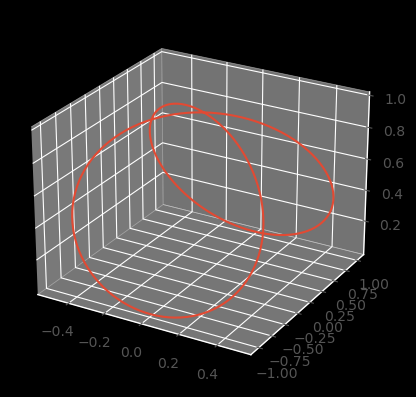

In [3]:
angles = np.linspace(0, 2*np.pi, 200)
dots = np.empty((3, len(angles)))
for n,i in enumerate(angles):
    x, y, z = gen_dot(i)
    dots[0, n] = x
    dots[1, n] = y
    dots[2, n] = z

    
plt.style.use("ggplot")
fig = plt.figure(figsize = (5, 5), dpi = 100, facecolor='black')
ax = fig.add_subplot(111, projection="3d")
ax.plot(dots[0], dots[1], dots[2])
ax.set_facecolor('black')
ax.view_init(elev=25)
# plt.axis('off')

In [4]:
from tqdm import tqdm

 98%|████████████████████████████████████████▎| 393/400 [00:04<00:00, 93.36it/s]

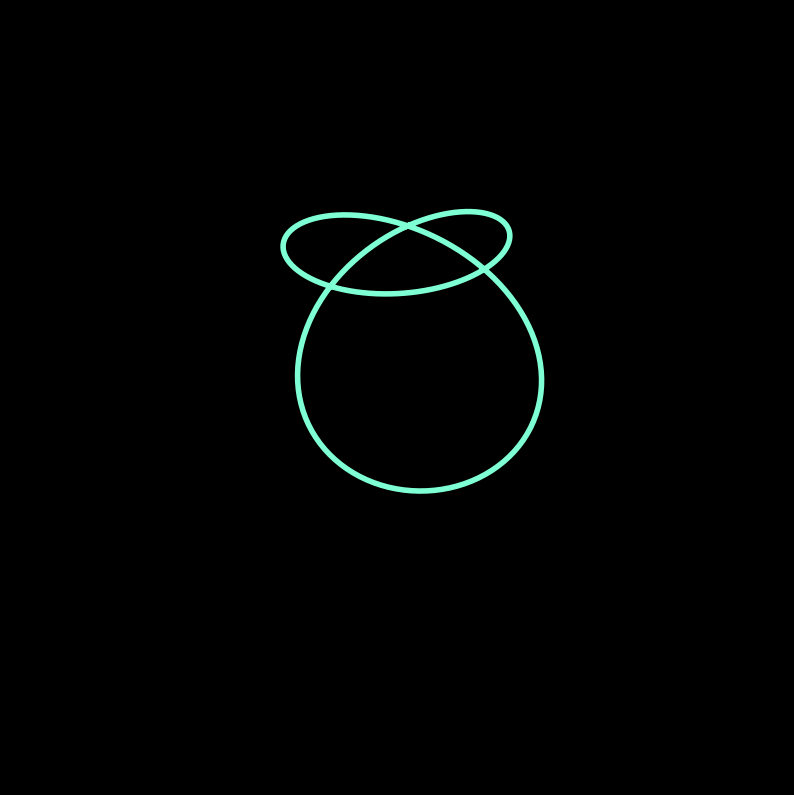

In [8]:
# Rotation animation

steps = 400
# angles = np.linspace(0, 2*np.pi, steps)

plt.style.use("ggplot")
fig = plt.figure(figsize = (5, 5), dpi = 200, facecolor='black')
ax = fig.add_subplot(111, projection="3d")
dots_plot, = ax.plot(dots[0], dots[1], dots[2], lw=2, color = 'aquamarine')
# vect, = ax.plot([0, dots[0]], [0, dots[1]], [0, dots[2]], lw=2, color = 'white')

ax.set_facecolor('black')

ax.set_xlim3d([-1, 1])
ax.set_ylim3d([-1, 1])
ax.set_zlim3d([-1, 1])

plt.axis('off')


def anim_vec(i):
    
    dots_plot.set_data_3d(dots[0, :i], dots[1, :i], dots[2, :i])
    # vect.set_data_3d([0, dots[0, i]], [0, dots[1, i]], [0, dots[2, i]])
    ax.view_init(elev=25., azim=i/1.5)
    
    return dots_plot,

ani = animation.FuncAnimation(fig, anim_vec, frames=tqdm(np.arange(steps),position=0, leave=True), interval=35, blit=True, repeat=True)
# ani.save('vect3d.mp4')

 99%|████████████████████████████████████████▌| 198/200 [00:10<00:00, 19.05it/s]

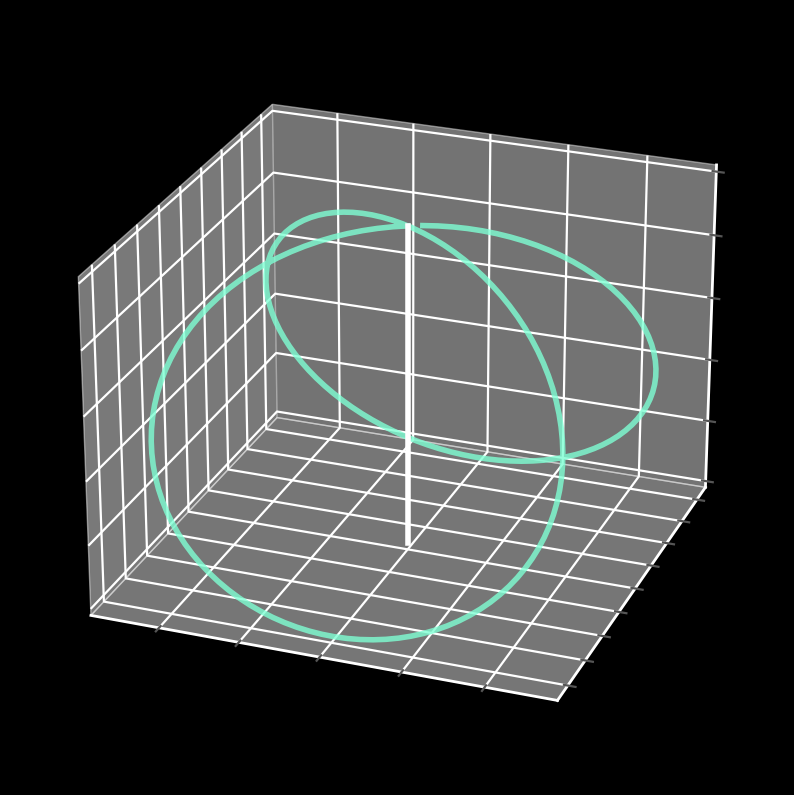

 99%|████████████████████████████████████████▌| 198/200 [00:21<00:00, 19.05it/s]

In [9]:
# Rotation animation

steps = 200
# angles = np.linspace(0, 2*np.pi, steps)

plt.style.use("ggplot")
fig = plt.figure(figsize = (5, 5), dpi = 200, facecolor='black')
ax = fig.add_subplot(111, projection="3d")

dots_plot, = ax.plot(dots[0], dots[1], dots[2], lw=2, color = 'aquamarine', alpha=0.8)
vect, = ax.plot([0, 0], [0, 0], [0, 0], lw=2, color = 'white')

ax.set_facecolor('black')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

for line in ax.xaxis.get_ticklines():
    line.set_visible(False)
    
for line in ax.yaxis.get_ticklines():
    line.set_visible(False)
    
for line in ax.zaxis.get_ticklines():
    line.set_visible(False)


def anim_vec(step):
    dots_plot.set_data_3d(dots[0, :step], dots[1, :step], dots[2, :step])
    vect.set_data_3d([0, dots[0, step]], [0, dots[1, step]], [0, dots[2, step]])
    ax.view_init(elev=25., azim=step/1.8)
    
    return vect, dots_plot

ani = animation.FuncAnimation(fig, anim_vec, frames=tqdm(np.arange(steps),position=0, leave=True), interval=35, blit=True, repeat=True)
# ani.save('vect3d_2.mp4', bitrate = 500, fps=20)
# ani.save('vect3d_2.mp4')